<a href="https://colab.research.google.com/github/MeghaGarg045030/PythonProject_Term1/blob/main/045030_Python_Project_WROGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **DEV-P PROJECT**





> **TOPIC-WROGN WEBSITE DATA ANALYSIS**




> Roll No.- 045030







For the analysis, the data set we are using is **'Wrogn Clothing Brand'**, where we used wrogn api to fetch the json of details of apparels available on the **'usplworld.com'** (wrogn) website. We then converted the json string into dataframe and took the columns(data) necessary.

As it a live website the data extracted every time will be different from the previous data due to which the findings can be a little different evrytime we run the code.

**COLLECTION OF DATA**

In [1]:
import json
import requests
import pandas as pd
from tabulate import tabulate

count = 1
df = pd.DataFrame()

def parse(data):        # Method to convert Json to Dataframe
    df = pd.DataFrame(data["product_list"])
    df = df[["sku", "name", "in_stock", "price", "discount", "display_price", "special_price", "color", "categories", "brand", "available_size_variants", "priority"]]
    return df

while count <= 100:    # No. Of Pages Searched
    url = "https://www.usplworld.com/api/products/wrogn/all/?p=" + str(count)   # API used to fetch the data
    refer_url = 'https://www.usplworld.com/wrogn/products/all/?p=' + str(count) # URL to the site
    headers = { 'Referer': refer_url}
    response = requests.get(url, headers=headers)
    data = json.loads(response.text)
    temp_df = parse(data)
    df = pd.concat([df, temp_df], ignore_index=True)    # Concatenatinng all the data received into one dataframe.
    count = count+1
table = tabulate(df, headers='keys', tablefmt='pretty')
print(table)

+------+-----------+-----------------------------------------------------------------+----------+--------+----------+---------------+---------------+-------+-------------+-------+--------------------------+----------+
|      |    sku    |                              name                               | in_stock | price  | discount | display_price | special_price | color | categories  | brand | available_size_variants  | priority |
+------+-----------+-----------------------------------------------------------------+----------+--------+----------+---------------+---------------+-------+-------------+-------+--------------------------+----------+
|  0   | WOSH0201S |   Wrogn Men White Slim Fit Floral Cotton Blend Casual Shirts    |   True   | 2099.0 |    55    |     944.0     |     944.0     |  109  |   Shirts    | wrogn |   _20__23__18__21__19_   |    59    |
|  1   | WETS0704  |       Wrogn Men Sienna Solid Slim Fit Round Neck T-Shirts       |   True   | 999.0  |    50    |     499.0 

The Received DataSet consists of 1600 rows and 12 columns.
**sku** - Unique product code.
**Name** - Represents the title of the product.
**Instock**- Whether the item is available or not.
**Price** - Price before discount
**Special Price** - Price After Discount.
**Color** - Gives the color code used internally by the site.
**Category** -Which Kind of Apparel.
**Available Sizes** - All the sizes available.
**Priority** - Represents the internal priority on which order of data to be shown is decided..

**DATA CLEANING AND PRE-PROCESSING**

As we can see both the columns are identical we can drop a column to reduce the dataset for better understanding and faster processing.

In [2]:
df = df.drop(columns=['special_price']) # Column Dropped
df

,sku,name,in_stock,price,discount,display_price,color,categories,brand,available_size_variants,priority
0,WOSH0201S,Wrogn Men White Slim Fit Floral Cotton Blend C...,True,2099.0,55,944.0,109,Shirts,wrogn,_20__23__18__21__19_,59
1,WETS0704,Wrogn Men Sienna Solid Slim Fit Round Neck T-S...,True,999.0,50,499.0,102,T Shirts,wrogn,_23__18__20__19__21_,72
2,WNJK6005,Wrogn Men Black Solid Jacket,True,3999.0,55,1799.0,94,Autumn Wear,wrogn,_21__18__20__19__23__22_,84
3,WNJK6019,Wrogn Men Red Solid Jacket,True,4599.0,55,2069.0,99,Autumn Wear,wrogn,_19__23__22__20__18__21_,86
4,WNJK6354,Wrogn Men Black Solid Jacket,True,4599.0,55,2069.0,94,Jackets,wrogn,_19__23__18__21_,88
...,...,...,...,...,...,...,...,...,...,...,...
1595,WNTR4005,Wrogn Men Navy Blue Solid Trouser,True,2999.0,60,1199.0,292,Trousers,wrogn,_14__15__13__12__16__17_,184
1596,AMJG2059,Wrogn Men Black Solid Jogger,True,2399.0,52,1151.0,94,Joggers,wrogn,_20__19__18__21__23_,187
1597,WOSH0198S,Wrogn Men Yellow Slim Fit Polka Dots Cotton Bl...,True,2099.0,55,949.0,110,Shirts,wrogn,_19__18__23__20__21_,239
1598,WNJK6340,Wrogn Men Olive Solid Jacket,True,4499.0,60,1799.0,119,Jackets,wrogn,_19__21__23__18_,256


We are provided with the color code, which is not clear for the analyst so we have fetched the color name from the name of the apparel and creating another column consisting of the color of the apparal.

In [3]:
df['color_name'] = df['name'].str.split().str[2]
df

,sku,name,in_stock,price,discount,display_price,color,categories,brand,available_size_variants,priority,color_name
0,WOSH0201S,Wrogn Men White Slim Fit Floral Cotton Blend C...,True,2099.0,55,944.0,109,Shirts,wrogn,_20__23__18__21__19_,59,White
1,WETS0704,Wrogn Men Sienna Solid Slim Fit Round Neck T-S...,True,999.0,50,499.0,102,T Shirts,wrogn,_23__18__20__19__21_,72,Sienna
2,WNJK6005,Wrogn Men Black Solid Jacket,True,3999.0,55,1799.0,94,Autumn Wear,wrogn,_21__18__20__19__23__22_,84,Black
3,WNJK6019,Wrogn Men Red Solid Jacket,True,4599.0,55,2069.0,99,Autumn Wear,wrogn,_19__23__22__20__18__21_,86,Red
4,WNJK6354,Wrogn Men Black Solid Jacket,True,4599.0,55,2069.0,94,Jackets,wrogn,_19__23__18__21_,88,Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,WNTR4005,Wrogn Men Navy Blue Solid Trouser,True,2999.0,60,1199.0,292,Trousers,wrogn,_14__15__13__12__16__17_,184,Navy
1596,AMJG2059,Wrogn Men Black Solid Jogger,True,2399.0,52,1151.0,94,Joggers,wrogn,_20__19__18__21__23_,187,Black
1597,WOSH0198S,Wrogn Men Yellow Slim Fit Polka Dots Cotton Bl...,True,2099.0,55,949.0,110,Shirts,wrogn,_19__18__23__20__21_,239,Yellow
1598,WNJK6340,Wrogn Men Olive Solid Jacket,True,4499.0,60,1799.0,119,Jackets,wrogn,_19__21__23__18_,256,Olive


Now we have to check which code belongs to which color, so we have grouped the data according to color code and found the color name specific to that code.

In [4]:
grouped = df.groupby('color')['color_name'].apply(list).reset_index() # grouping the data
grouped['color_name'] = grouped['color_name'].apply(lambda x: list(set(x)))
print(grouped)

   color  color_name
0     94     [Black]
1     98      [Blue]
2     99       [Red]
3    102    [Sienna]
4    108     [Green]
5    109     [White]
6    110    [Yellow]
7    119     [Olive]
8    155  [Charcoal]
9    292      [Navy]


""""""

Outlier Analysis:-

In [5]:
import pandas as pd
import numpy as np

# Z-Score method for price and discount columns
z_score_price = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
z_score_discount = np.abs((df['discount'] - df['discount'].mean()) / df['discount'].std())

# Identify outliers using a threshold (e.g., Z-Score > 2)
threshold = 2
outliers = df[(z_score_price > threshold) | (z_score_discount > threshold)]

# IQR method for price and discount columns
numeric_columns = ['price', 'discount']  # List of numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
iqr_outliers = df[(df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)].dropna()

print("Z-Score Outliers:")
print(outliers)
print("\nIQR Outliers:")
print(iqr_outliers)

Z-Score Outliers:
Empty DataFrame
Columns: [sku, name, in_stock, price, discount, display_price, color, categories, brand, available_size_variants, priority, color_name]
Index: []

IQR Outliers:
Empty DataFrame
Columns: [sku, name, in_stock, price, discount, display_price, color, categories, brand, available_size_variants, priority, color_name]
Index: []


[]

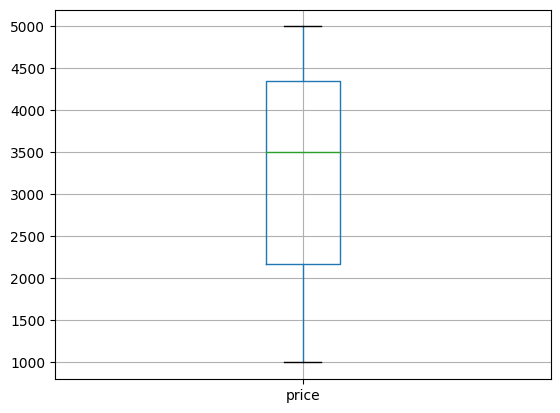

In [6]:
# Outlier analysis Using Box-Plot for prices column
b_plot = df.boxplot(column = 'price')
b_plot.plot()


From the above 2 analysis we can observe that there are no outliers present in our dataset.
So, the final dataset after Data cleaning and pre-procesing is :-

In [7]:
df # displaying the whole dataset

,sku,name,in_stock,price,discount,display_price,color,categories,brand,available_size_variants,priority,color_name
0,WOSH0201S,Wrogn Men White Slim Fit Floral Cotton Blend C...,True,2099.0,55,944.0,109,Shirts,wrogn,_20__23__18__21__19_,59,White
1,WETS0704,Wrogn Men Sienna Solid Slim Fit Round Neck T-S...,True,999.0,50,499.0,102,T Shirts,wrogn,_23__18__20__19__21_,72,Sienna
2,WNJK6005,Wrogn Men Black Solid Jacket,True,3999.0,55,1799.0,94,Autumn Wear,wrogn,_21__18__20__19__23__22_,84,Black
3,WNJK6019,Wrogn Men Red Solid Jacket,True,4599.0,55,2069.0,99,Autumn Wear,wrogn,_19__23__22__20__18__21_,86,Red
4,WNJK6354,Wrogn Men Black Solid Jacket,True,4599.0,55,2069.0,94,Jackets,wrogn,_19__23__18__21_,88,Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,WNTR4005,Wrogn Men Navy Blue Solid Trouser,True,2999.0,60,1199.0,292,Trousers,wrogn,_14__15__13__12__16__17_,184,Navy
1596,AMJG2059,Wrogn Men Black Solid Jogger,True,2399.0,52,1151.0,94,Joggers,wrogn,_20__19__18__21__23_,187,Black
1597,WOSH0198S,Wrogn Men Yellow Slim Fit Polka Dots Cotton Bl...,True,2099.0,55,949.0,110,Shirts,wrogn,_19__18__23__20__21_,239,Yellow
1598,WNJK6340,Wrogn Men Olive Solid Jacket,True,4499.0,60,1799.0,119,Jackets,wrogn,_19__21__23__18_,256,Olive


**DATA ANALYSIS**

In [8]:
df[["price","discount","display_price"]].describe()  # Calculating the basic mean,count,std for the whole data.

,price,discount,display_price
count,1600.000000,1600.000000,1600.000000
mean,3224.000000,56.500000,1378.312500
std,1245.128092,3.373739,500.105395
min,999.000000,50.000000,499.000000
25%,2174.000000,55.000000,947.750000
50%,3499.000000,55.000000,1399.000000
75%,4349.000000,60.000000,1799.000000
max,4999.000000,60.000000,2069.000000


+----------+-----------+
|  Color   | Frequency |
+----------+-----------+
|  Black   |    500    |
|  White   |    200    |
|   Navy   |    200    |
|  Sienna  |    100    |
|   Red    |    100    |
| Charcoal |    100    |
|   Blue   |    100    |
|  Yellow  |    100    |
|  Olive   |    100    |
|  Green   |    100    |
+----------+-----------+


<Figure size 800x600 with 0 Axes>

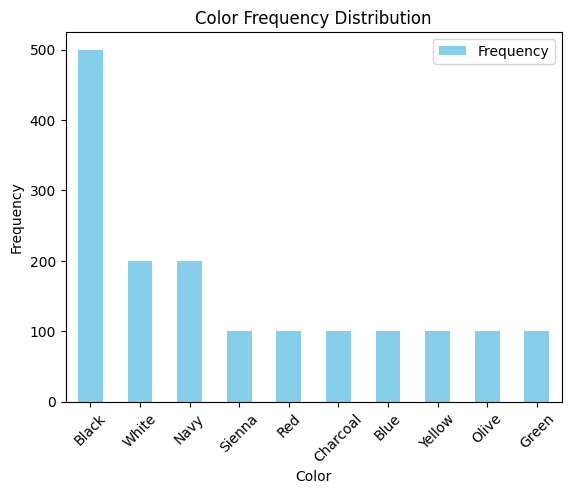

In [10]:
# Making a color frequency distribution.
import matplotlib.pyplot as plt
color_frequency = df['color_name'].value_counts().reset_index()
color_frequency.columns = ['Color', 'Frequency']

# Display color frequency table
table = tabulate(color_frequency, headers='keys', tablefmt='pretty', showindex=False)
print(table)

# Create a bar chart for color frequency distribution
plt.figure(figsize=(8, 6))
color_frequency.plot(x='Color', y='Frequency', kind='bar', color='skyblue')
plt.title('Color Frequency Distribution')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

As observed above, number of black color apparels are relatively high as compared to other.

+-------------+-----------+
|  Category   | Frequency |
+-------------+-----------+
|   Jackets   |    500    |
| Autumn Wear |    400    |
|   Shirts    |    300    |
|   Joggers   |    200    |
|  T Shirts   |    100    |
|  Trousers   |    100    |
+-------------+-----------+


<Figure size 600x400 with 0 Axes>

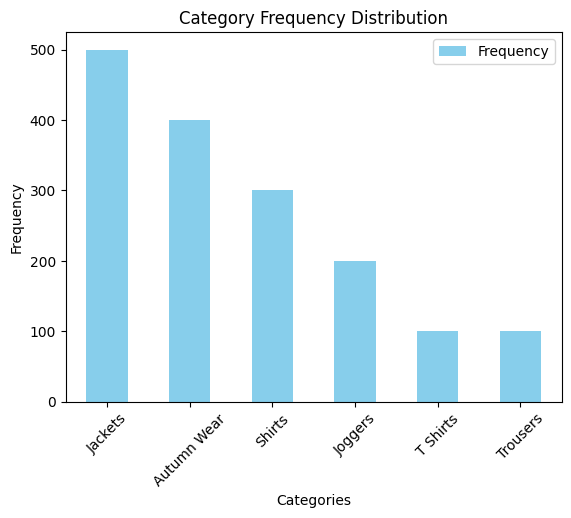

In [11]:
category_frequency = df['categories'].value_counts().reset_index()
category_frequency.columns = ['Category', 'Frequency']

# Display category frequency table
table = tabulate(category_frequency, headers='keys', tablefmt='pretty', showindex=False)
print(table)

# Create a bar chart for category frequency distribution
plt.figure(figsize=(6, 4))
category_frequency.plot(x='Category', y='Frequency', kind='bar', color='skyblue')
plt.title('Category Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

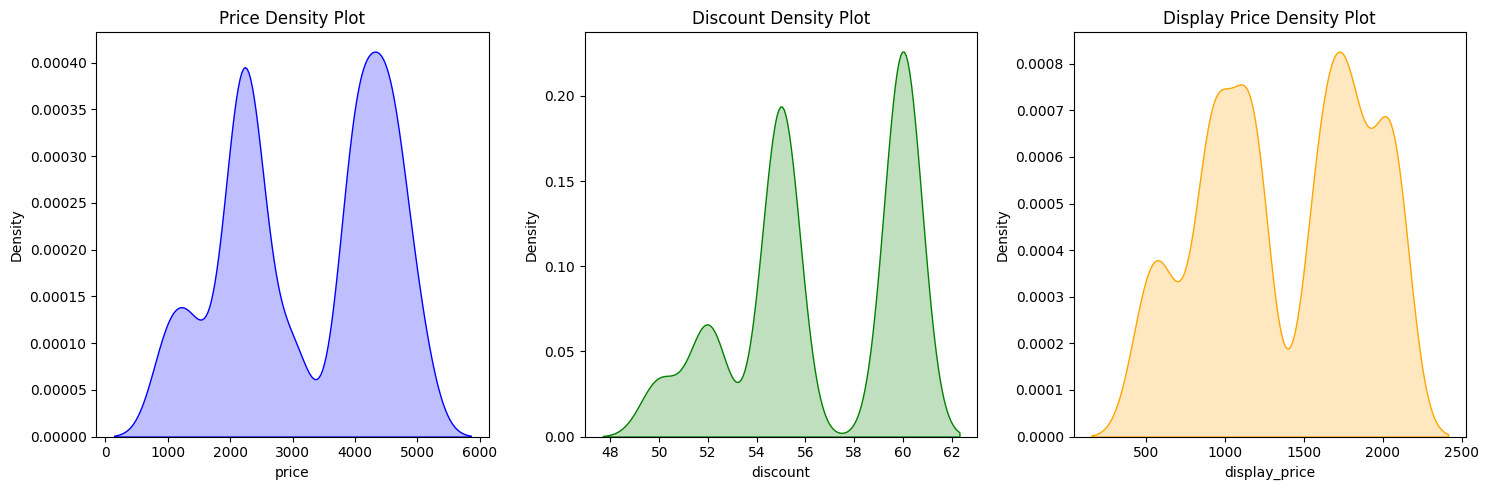

In [12]:
# Density Plot For Price, Discount and Display Price.
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create kernel density plots for 'price', 'discount', and 'display_price'
sns.kdeplot(data=df['price'], ax=axes[0], fill=True, color='blue')
axes[0].set_title('Price Density Plot')
sns.kdeplot(data=df['discount'], ax=axes[1], fill=True, color='green')
axes[1].set_title('Discount Density Plot')
sns.kdeplot(data=df['display_price'], ax=axes[2], fill=True, color='orange')
axes[2].set_title('Display Price Density Plot')

# Adjust subplot layout
plt.tight_layout()

# Show the kernel density plots
plt.show()

In [13]:
# Find Correlation Between Price And Discount

correlation_coefficient = df['price'].corr(df['discount'])

# Print the correlation coefficient
print(f"Pearson's Correlation Coefficient between Price and Discount: {correlation_coefficient:.2f}")

Pearson's Correlation Coefficient between Price and Discount: 0.57


Low correlation between the two.

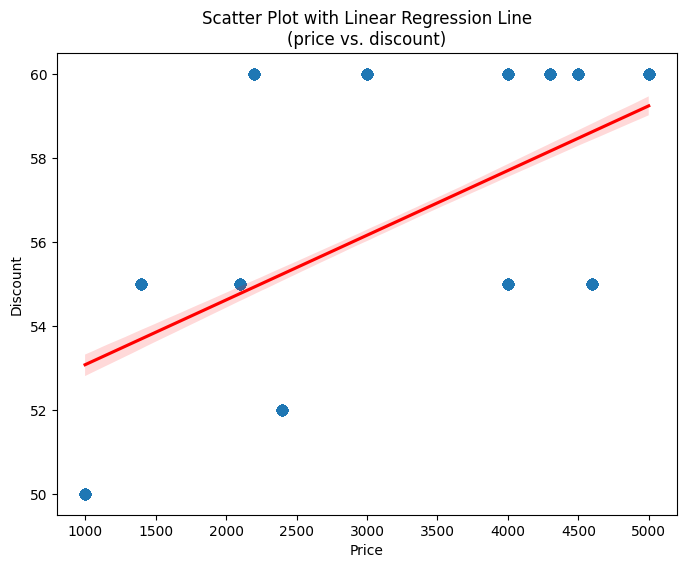

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='discount', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add labels and a title
plt.title('Scatter Plot with Linear Regression Line\n(price vs. discount)')
plt.xlabel('Price')
plt.ylabel('Discount')

# Show the plot
plt.show()


In [15]:
# Correlation between Price And Priority.

correlation_coefficient = df['price'].corr(df['priority'])

# Print the correlation coefficient
print(f"Pearson's Correlation Coefficient between Price and Discount: {correlation_coefficient:.2f}")

Pearson's Correlation Coefficient between Price and Discount: 0.27


No correlation between the two.

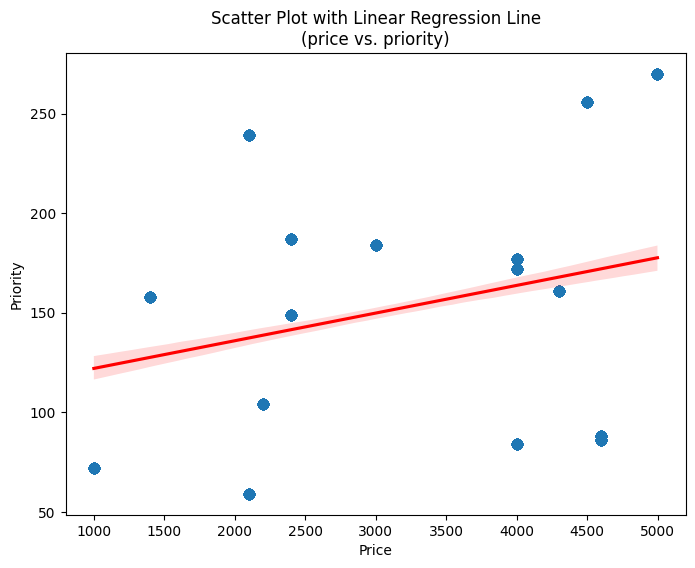

In [16]:
plt.figure(figsize=(8, 6))
sns.regplot(x='price', y='priority', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add labels and a title
plt.title('Scatter Plot with Linear Regression Line\n(price vs. priority)')
plt.xlabel('Price')
plt.ylabel('Priority')

# Show the plot
plt.show()

<ipython-input-17-9ee088652349>:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='priority', y='categories', data=df, jitter=True, palette='viridis')


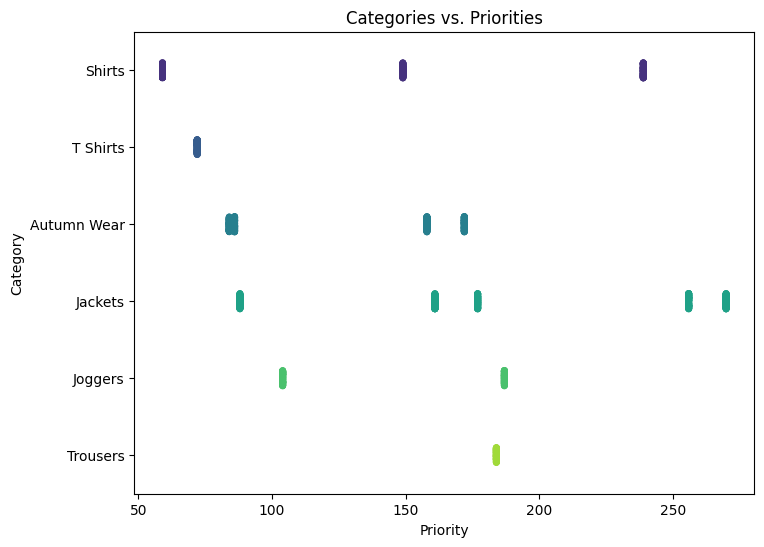

In [17]:
# Relation betweeen Categories And Priorities.

import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = df.pivot_table(index='categories', columns='priority', aggfunc='size', fill_value=0)

plt.figure(figsize=(8, 6))
sns.stripplot(x='priority', y='categories', data=df, jitter=True, palette='viridis')
plt.title('Categories vs. Priorities')
plt.xlabel('Priority')
plt.ylabel('Category')
plt.show()


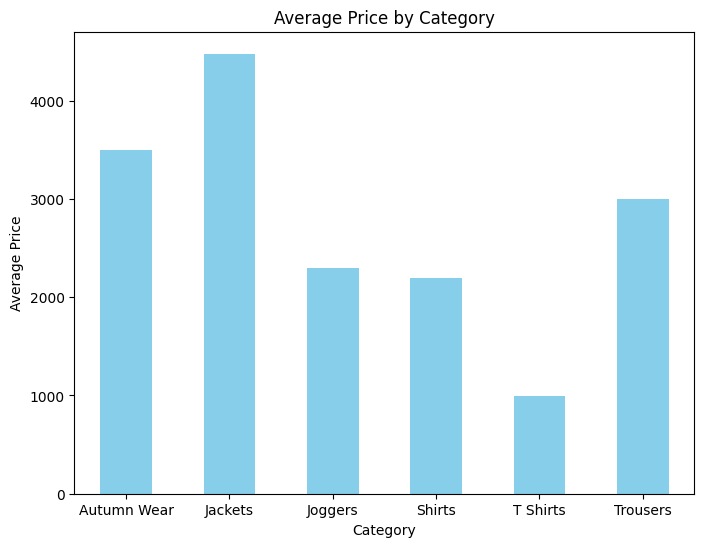

In [18]:
# Calculating Average Price Of Each Category.
average_price_by_category = df.groupby('categories')['price'].mean()

plt.figure(figsize=(8, 6))
average_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [19]:
grouped = df.groupby('categories')
category_dataframes = {}  # Empty Dictionary
# Iterate through the groups and create DataFrames for each category
for category, group in grouped:
    category_dataframes[category] = group

# To Access A Particular Data Frame:- category_dataframes.get('Shirt') or category_dataframes["Shirts"]

In [20]:
category_dataframes["Jackets"].head(5) # Accessing a particular category data.

,sku,name,in_stock,price,discount,display_price,color,categories,brand,available_size_variants,priority,color_name
4,WNJK6354,Wrogn Men Black Solid Jacket,True,4599.0,55,2069.0,94,Jackets,wrogn,_19__23__18__21_,88,Black
8,WNJK6411,Wrogn Men Black Camouflage Jacket,True,4299.0,60,1719.0,94,Jackets,wrogn,_23__18__21__19_,161,Black
10,WNJK6336,Wrogn Men Navy Blue Solid Jacket,True,3999.0,60,1599.0,292,Jackets,wrogn,_19__23__21__18_,177,Navy
14,WNJK6340,Wrogn Men Olive Solid Jacket,True,4499.0,60,1799.0,119,Jackets,wrogn,_19__21__23__18_,256,Olive
15,WNJK6347,Wrogn Men Green Solid Jacket,True,4999.0,60,1999.0,108,Jackets,wrogn,_18__19__23__21_,270,Green


In [21]:

# Calculating the mean, median, and standard deviation for "price" and "discount" in the "Shirts" DataFrame
shirts_df = category_dataframes["Shirts"]

# Calculate the mean, median, and standard deviation for "price"
mean_price = shirts_df["price"].mean()
median_price = shirts_df["price"].median()
stddev_price = shirts_df["price"].std()

# Calculate the mean, median, and standard deviation for "discount"
mean_discount = shirts_df["discount"].mean()
median_discount = shirts_df["discount"].median()
stddev_discount = shirts_df["discount"].std()

# Print the results
print("Price - Mean:", mean_price)
print("Price - Median:", median_price)
print("Price - Standard Deviation:", stddev_price)

print("Discount - Mean:", mean_discount)
print("Discount - Median:", median_discount)
print("Discount - Standard Deviation:", stddev_discount)


Price - Mean: 2199.0
Price - Median: 2099.0
Price - Standard Deviation: 141.6576493949657
Discount - Mean: 54.0
Discount - Median: 55.0
Discount - Standard Deviation: 1.416576493949657


In [22]:
# Calculating the mean, median, and standard deviation for "price" and "discount" in the "Jacket" DataFrame
jackets_df = category_dataframes["Jackets"]

# Calculate the mean, median, and standard deviation for "price"
mean_price = jackets_df["price"].mean()
median_price = jackets_df["price"].median()
stddev_price = jackets_df["price"].std()

# Calculate the mean, median, and standard deviation for "discount"
mean_discount = jackets_df["discount"].mean()
median_discount = jackets_df["discount"].median()
stddev_discount = jackets_df["discount"].std()

# Print the results
print("Price - Mean:", mean_price)
print("Price - Median:", median_price)
print("Price - Standard Deviation:", stddev_price)

print("Discount - Mean:", mean_discount)
print("Discount - Median:", median_discount)
print("Discount - Standard Deviation:", stddev_discount)

Price - Mean: 4479.0
Price - Median: 4499.0
Price - Standard Deviation: 331.39046346954086
Discount - Mean: 59.0
Discount - Median: 60.0
Discount - Standard Deviation: 2.0020030050087656


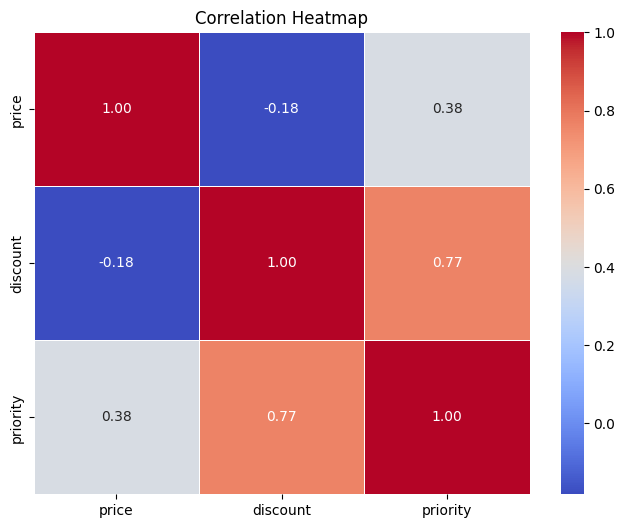

In [23]:
# Creating Correlation HeatMap of the Jackets Dataframe

columns_for_heatmap = ['price', 'discount', 'priority']
subset_df = category_dataframes["Jackets"][columns_for_heatmap]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# Calculating the mean, median, and standard deviation for "price" and "discount" in the "Autumn Wear" DataFrame
autumn_df = category_dataframes["Autumn Wear"]

# Calculate the mean, median, and standard deviation for "price"
mean_price = autumn_df["price"].mean()
median_price = autumn_df["price"].median()
stddev_price = autumn_df["price"].std()

# Calculate the mean, median, and standard deviation for "discount"
mean_discount = autumn_df["discount"].mean()
median_discount = autumn_df["discount"].median()
stddev_discount = autumn_df["discount"].std()

# Print the results
print("Price - Mean:", mean_price)
print("Price - Median:", median_price)
print("Price - Standard Deviation:", stddev_price)

print("Discount - Mean:", mean_discount)
print("Discount - Median:", median_discount)
print("Discount - Standard Deviation:", stddev_discount)

Price - Mean: 3499.0
Price - Median: 3999.0
Price - Standard Deviation: 1238.480757406495
Discount - Mean: 56.25
Discount - Median: 55.0
Discount - Standard Deviation: 2.1677749238103


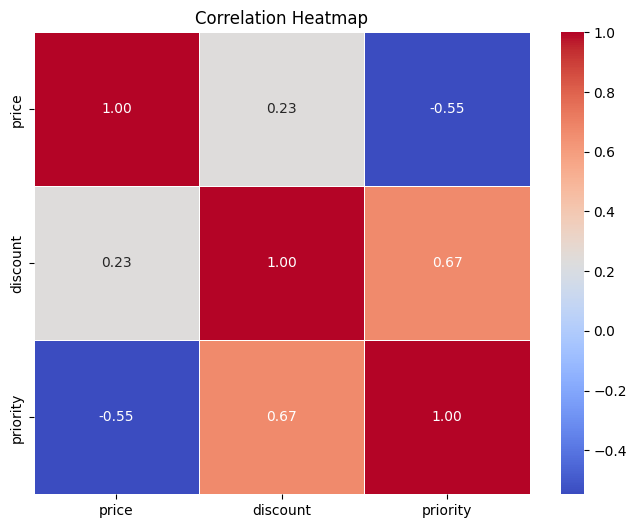

In [25]:
# Creating Correlation HeatMap of the Autumn Wear Dataframe

columns_for_heatmap = ['price', 'discount', 'priority']
subset_df = category_dataframes["Autumn Wear"][columns_for_heatmap]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()